In [7]:
# %load withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float('nan')])

def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert(np.sum(activations) == row.number_activations or row.error)
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d['attacker_compute'] = rcompute[0]
    d['attacker_relative_activations'] = ractivations[0]
    d['attacker_relative_reward'] = rreward[0]
    d['attacker_gain'] = rreward[0] - ractivations[0]
    d['attacker_efficiency'] = rreward[0] / ractivations[0]
    return d

df=df.join(df.apply(expand, axis=1, result_type='expand'))

In [8]:
df.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'scenario', 'scenario_description',
       'strategy', 'strategy_description', 'reward', 'machine_duration_s',
       'error', 'attacker_compute', 'attacker_relative_activations',
       'attacker_relative_reward', 'attacker_gain', 'attacker_efficiency'],
      dtype='object')

In [9]:
df.pivot(index=['attacker_compute', 'k'], columns=['protocol', 'strategy', 'incentive_scheme'], values='attacker_gain')

protocol                 bk+ll                                     \
strategy                honest           selfish-simple             
incentive_scheme      constant     block       constant     block   
attacker_compute k                                                  
0.1              1    0.000000  0.000000       0.000000  0.000000   
                 2    0.000000 -0.000043      -0.036089  0.009081   
                 4    0.000000  0.000123      -0.052866  0.026695   
                 8    0.000000  0.000803      -0.058914  0.062023   
                 16   0.000000  0.000131      -0.058746  0.123492   
...                        ...       ...            ...       ...   
0.5              8    0.000000 -0.000061       0.035012  0.433204   
                 16   0.000000 -0.002914       0.028642  0.492889   
                 32   0.000000 -0.003476       0.015496  0.499496   
                 64   0.000000  0.003627       0.007877  0.499819   
                 128 -0.000004 -0.004405       0.003856  0.499755   

protocol                                                      bk            \
strategy             selfish-advanced           selfish-advanced             
incentive_scheme             constant     block         constant     block   
attacker_compute k                                                           
0.1              1          -0.099981 -0.099981        -0.033326 -0.033326   
                 2          -0.076461 -0.078419        -0.068070 -0.054802   
                 4          -0.083405 -0.073991        -0.081548 -0.062215   
                 8          -0.085543 -0.063350        -0.087364 -0.063001   
                 16         -0.084200 -0.038635        -0.089120 -0.055729   
...                               ...       ...              ...       ...   
0.5              8           0.361830  0.457578         0.352958  0.440308   
                 16          0.437638  0.499159         0.436412  0.498216   
                 32          0.467003  0.500579         0.467003  0.500579   
                 64          0.485547  0.499562         0.485006  0.499741   
                 128         0.491089  0.500076         0.492441  0.499819   

protocol                                  
strategy                honest            
incentive_scheme      constant     block  
attacker_compute k                        
0.1              1    0.000000  0.000000  
                 2    0.000000  0.000487  
                 4    0.000000  0.000079  
                 8    0.000000 -0.000333  
                 16   0.000000 -0.001277  
...                        ...       ...  
0.5              8    0.000000 -0.000323  
                 16   0.000000  0.004192  
                 32   0.000000  0.000957  
                 64   0.000000  0.001203  
                 128  0.000008  0.003339  

[64 rows x 10 columns]

<IPython.core.display.Javascript object>


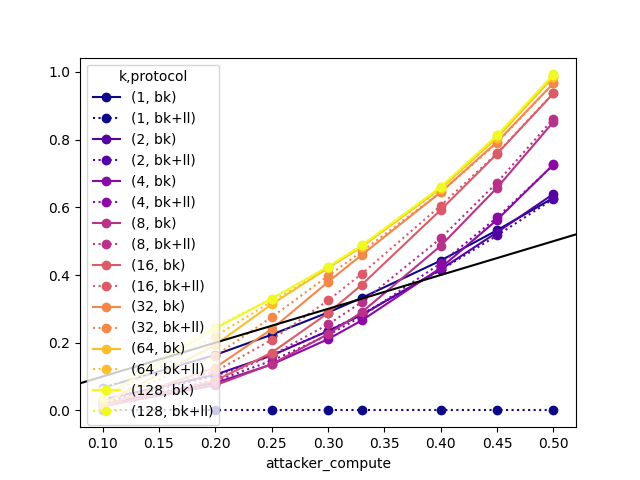

In [11]:
d = df[(df['strategy']=='selfish-advanced') & (df['incentive_scheme']=='constant')]
d = d.pivot(index=['attacker_compute'], columns=['k', 'protocol'], values='attacker_relative_reward')
d = d[sorted(d.columns)]
line_style = [ 'o-' if proto == 'bk' else 'o:' for (k, proto) in  d.columns]
k = np.unique([ k for (k, proto) in d.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in d.columns ]
line_colors
p = d.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')